<table style="border: none; text-align: center" width="100%">
  <tr style="border: none">
    <td style="min-width:250px; border:none; text-align:left" bgcolor="white">
      <a href="https://www.audiolabs-erlangen.de/" target="_blank">
        <img src="./files/logo_alabs.svg" style="height:30px; display:inline-block" />
      </a>
    </td>
    <td style="min-width:250px; border:none; text-align:center" bgcolor="white">
      <a href="https://www.fau.de/" target="_blank">
        <img src="./files/logo_fau.svg" style="height:50px; display:inline-block" />
      </a>
    </td>
    <td style="min-width:250px; border:none; text-align:right" bgcolor="white">
      <a href="https://www.iis.fraunhofer.de/" target="_blank">
        <img src="./files/logo_iis.svg" style="height:30px; display:inline-block" />
      </a>
    </td>
</tr>
</table>

<div style="text-align: center">
<h1>Harmonic Percussive Source Separation</h1>
<b>Lab Course</b><br/>
<b>International Audio Laboratories Erlangen</b><br/>
<b>Prof. Dr. Meinard Müller</b><br/>
<b>Winter Term 2018/19</b>
</div>

<br/>

<div class="list-group">
  <a style="padding: 7px" class="list-group-item disabled"><b>Authors</b></a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/professor/mueller" class="list-group-item">Meinard Müller</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/driedger" class="list-group-item">Jonathan Driedger</a>
    <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/praetzlich" class="list-group-item">Thomas Prätzlich</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow" class="list-group-item">Frank Zalkow</a>
</div>

<div class="list-group">
  <a style="padding: 7px" class="list-group-item disabled"><b>Tutors of this Semester</b></a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/lopez" class="list-group-item">Patricio López-Serrano</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/rosenzweig" class="list-group-item">Sebastian Rosenzweig</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow" class="list-group-item">Frank Zalkow</a>
</div>

<div>
<em>Harmonic Percussive Source Separation</em>, &copy; September 2018
</div>

## <a name="abstract"></a> Abstract

Sounds can broadly be classified into two classes. Harmonic
sound on the one hand side is what we perceive as
pitched sound and what makes us hear melodies and chords.
Percussive sound on the other hand is noise-like and usually
stems from instrument onsets like the hit on a drum or from
consonants in speech.
The goal of harmonic-percussive
source separation (HPSS) is to decompose an input audio signal
into a signal consisting of all harmonic sounds
and a signal consisting of all percussive sounds.
In this lab course, we study an HPSS algorithm and implement it in Python.
Exploiting knowledge about the spectral structure of harmonic and percussive sounds,
this algorithm decomposes the spectrogram of the given input signal
into two spectrograms, one for the harmonic, and one for the percussive component.
Afterwards, two waveforms are reconstructed from the spectrograms
which finally form the desired signals.
Additionally, we describe the application of HPSS for enhancing chroma feature extraction and onset detection.
The techniques used in this lab cover median filtering, spectral masking and
the inversion of the short-time Fourier transform.

## <a name="hpss"></a> Harmonic-Percussive Source Separation

When listening to our environment, there exists a wide variety of different sounds.
However, on a very coarse level, many sounds can be
categorized to belong in either one of two classes:
harmonic or percussive sounds.
Harmonic sounds are the ones which we perceive to have a certain *pitch* such that we could for example sing along to them.
The sound of a violin is a good example of a harmonic sound.
*Percussive* sounds often stem from two colliding objects like for example the two shells of castanets.
An important characteristic of percussive sounds is that they do not have a pitch but a very clear
localization in time.
Many real-world sounds are mixtures of harmonic and percussive components.
For example, a note played on a piano has a percussive onset (resulting from the hammer hitting the strings)
preceding the harmonic tone (resulting from the vibrating string).

The goal of harmonic-percussive source separation (HPSS) is to decompose a given input signal into a
sum of two component signals,
one consisting of all harmonic sounds and the other consisting of all percussive sounds.
The core observation in many HPSS algorithms is that in a spectrogram representation of the
input signal, harmonic sounds tend to form horizontal structures (in time-direction), while
percussive sounds form vertical structures (in frequency-direction).
For an example, have a look at following Figure where you can see the power spectrograms of two signals.
The left Figure shows the power spectrogram of a sine-tone with a frequency of
$4000$ Hz and a duration of one second.
This tone is as harmonic as a sound can be.
The power spectrogram shows just one horizontal line.
Contrary, the power spectrogram on the rigtht side shows just one vertical line.
It is the spectrogram of a signal which is zero everywhere, except for the sample at $0.5$ seconds  where it is one.
Therefore, when listening to this signal, we just hear a brief ``click'' at $0.5$ seconds.
This signal is the prototype of a percussive sound.
The same kind of structures can be observed in lower Figure, which shows a
spectrogram of a violin recording and a spectrogram of a castanets recording.

<table>
  <tr>
    <th>
      <img src="./files/figure_spec_sinusoid.svg">
     </th>
     <th>
      <img src="./files/figure_spec_impulse.svg">
     </th>
   </tr>
   <tr>
    <th style="text-align: center;">
      Spectrogram of an ideal harmonic signal.
     </th>
     <th style="text-align: center;">
      Spectrogram of an ideal percussive signal.
     </th>
   </tr>
   <tr>
    <th>
      <img src="./files/figure_spec_violin.svg">
     </th>
     <th>
      <img src="./files/figure_spec_castanets.svg">
     </th>
   </tr>
   <tr>
    <th style="text-align: center;">
      Spectrogram of a recording of a violin.
     </th>
     <th style="text-align: center;">
      Spectrogram of a recording of a castanets.
     </th>
   </tr>
</table>

Real world signals are usually mixtures of harmonic and percussive sounds.
Furthermore, there is no absolute definition of when a sound stops "being harmonic" and starts "being percussive".
Think, for example, of white noise which cannot be assigned to either one of these classes.
However, with the above observations it is possible to decide if a time-frequency instance
of a spectral representation of the input signal, like the short-time Fourier transform (STFT), belongs rather to
the harmonic component or rather to the percussive component.
This can be done in the following way.
Assume we want to find out if a time-frequency bin in the STFT of the input signal belongs
to the harmonic component.
In this case, the bin should be part of some horizontal, and therefore harmonic structure.
We can check this by first applying some filter to the power spectrogram of the STFT, which enhances horizontal structures
and suppresses vertical structures and see if the filtered bin has some "high value".
However, even if its value is high, it might still belong to some even stronger vertical, and therefore
percussive structure.
We therefore apply another filter to the power spectrogram which enhances vertical structures and suppresses horizontal structures.
Now, in the case that the value of our bin in this vertically enhanced spectrogram is lower than in the horizontally enhanced
spectrogram, it is very likely that it belongs to some harmonic sound and we can assign it to the harmonic component.
Otherwise, if its value was higher in the vertically enhanced spectrogram, we directly know that it is rather
part of some percussive sound and assign it to the percussive component.
This way, we can decide for every time-frequency instance of the original STFT of the input signal whether it belongs
to the harmonic, or to the percussive component and construct two new STFTs.
In the STFT for the harmonic component, all bins which were assigned to the percussive component are set to zero,
and vice versa for the percussive component.
Finally, by "inverting" these STFTs, we get the audio signals for the harmonic and the percussive component.

## <a name="algoritm"></a> An HPSS Algorithm

We will now describe an actual HPSS algorithm.
Formally, given a discrete input audio signal $x:{\mathbb Z}\to{\mathbb R}$, the algorithm should compute a harmonic component signal $x_\mathrm{h}$
and a percussive component signal $x_\mathrm{p}$, such that $x = x_\mathrm{h} + x_\mathrm{p}$.
Furthermore, the signals  $x_\mathrm{h}$ and $x_\mathrm{p}$ contain the harmonic and percussive sounds of $x$, respectively.
In the following we describe the consecutive steps of an HPSS algorithm.
We start with the computation of the *STFT* (Subsection [STFT](#STFT)) and proceed
with enhancing the power spectrogram using *median filtering* (Subsection [Median Filtering](#MedFilt)).
Afterwards, the filtered spectrograms are used to compute *binary masks* (Subsection [Binary Masking](#Mask)) which are
used to construct STFTs for the harmonic and the percussive component.
These STFTs are finally transformed back to the time domain (Subsection [ISTFT](#ISTFT)).

### <a name="STFT"></a> STFT

In the first step, we compute  the short-time Fourier transform (STFT) ${\mathcal X}$ of the signal $x$ as:

\begin{equation}
    {\mathcal X}(m,k):= \sum_{n=0}^{N-1} x(n + m H)w(n)\exp(-2\pi ikn/N)
\end{equation}

with ${m\in[0:M-1]:=\{0,\ldots,M -1\}}$ and $k\in[0:N-1]$, where $M$ is the number of frames,
$N$ is the frame size and length of the discrete Fourier transform,
${w:[0:N -1]\to{\mathbb R}}$ is a window function and $H$ is the hopsize.
From ${\mathcal X}$ we can then derive the power spectrogram ${\mathcal Y}$ of $x$:

\begin{equation}
    {\mathcal Y}(m,k) := |{\mathcal X}(m,k)|^2.
\end{equation}

<div class="alert alert-block alert-warning">
<b>Lab Experiment 1</b><br>
Load an audio file <samp>CastanetsViolin.wav</samp> using <samp>librosa</samp>.
</div>

In [1]:
import librosa
from IPython.display import Audio

x, Fs = librosa.load("files/CastanetsViolin.wav")

Audio(x, rate=Fs)

<div class="alert alert-block alert-warning">
Compute the STFT ${\mathcal X}$ of the input signal $x$ using <samp>librosa.stft</samp> with the parameters <samp>N=1024</samp>, <samp>H=512</samp>, and a hann-window.
</div>

In [2]:
# your code here...
stft_x = librosa.stft(x, n_fft = 1024, hop_length=512, window='hann')
x.shape

(147008,)

<div class="alert alert-block alert-warning">
Compute the power spectrogram ${\mathcal Y}$.
</div>

In [3]:
import numpy as np

# your code here...
stft_y = np.abs(stft_x) ** 2

<div class="alert alert-block alert-warning">
Visualize ${\mathcal Y}$. Can you spot harmonic and percussive structures?
      Apply logarithmic compression with $\gamma=10$ (see STFT Lab for details on this) when visualizing spectrograms.
</div>

In [4]:
from matplotlib import pyplot as plt

def plot_spectogram_compressed(v, gama=10):
    if(gama == 0):
        compressed_v = v
    else:
        compressed_v = np.log(1 + gama * v)
    plt.imshow(compressed_v, cmap='gray_r' , aspect='auto', origin='lower')
    plt.show()
    
# your code here...
plot_spectogram_compressed(stft_y)

<Figure size 640x480 with 1 Axes>

<div class="alert alert-block alert-warning">
Do the same for the parameters $N=128$, $H=64$, a hann-window, and $N=8192$, $H=4096$, and a hann-window.
      How do the spectrograms change when you change the parameters? What happens to the harmonic and percussive structures?
</div>

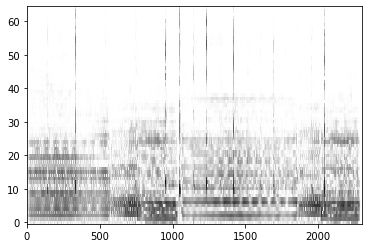

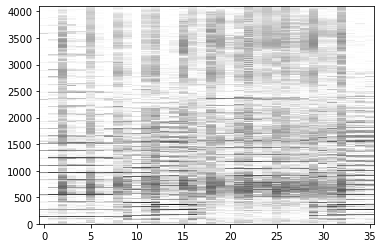

In [5]:
# your code here...
stft_x_1 = librosa.stft(x, n_fft = 128, hop_length=64, window='hann')
stft_y_1 = np.abs(stft_x_1) ** 2
stft_x_2 = librosa.stft(x, n_fft = 8192, hop_length=4096, window='hann')
stft_y_2 = np.abs(stft_x_2) ** 2
plot_spectogram_compressed(stft_y_1)
plot_spectogram_compressed(stft_y_2)

À partir da mudança de parâmetros, parece que quando o número de janelas é um valor muito grande, o STFT não consegue visuazar as batidas da percussão.

### <a name="MedFilt"></a> Median Filtering

In the next step, we want to compute a *harmonically enhanced* spectrogram $\tilde{{\mathcal Y}}_\mathrm{h}$ and
a percussively enhanced spectrogram $\tilde{{\mathcal Y}}_\mathrm{p}$ by filtering ${\mathcal Y}$.
This can be done by using a *median filter*.
The median of a list of numbers can be found by arranging all numbers from lowest to highest value and picking
the middle one.
E.g. the median of the list $(7, 3, 4, 6, 5)$ is $5$.
Formally, let $A = (a_1, a_2, \dots, a_L)$ be a list of length $L \in {\mathbb N}$ consisting of real numbers $a_l \in {\mathbb R}, l \in [1:L]$.
First, the elements of $A$ are sorted in ascending order. This results in a list
$\tilde{A} = (\tilde{a}_1, \tilde{a}_2, \dots, \tilde{a}_L)$
with $\tilde{a}_l \leq \tilde{a}_m$ for $l < m$ and $l, m \in [1:L]$.
Then, the ${\mathrm{median}}$ of $A$ is defined as

\begin{equation}
{\mathrm{median}}(A) := \begin{cases} \tilde{a}_{(L+1)/2} & \mbox{for $L$ being odd}\\ (\tilde{a}_{L/2} + \tilde{a}_{L/2+1})/2 & \mbox{otherwise}\end{cases}
\end{equation}

Now, given a matrix $B\in{\mathbb R}^{M\times K}$, we define harmonic and percussive median filters

\begin{eqnarray}
    {\mathrm{medfilt}_\mathrm{h}}(B)(m,k) := {\mathrm{median}}(\{B(m-\ell_\mathrm{h},k),\ldots,B(m+\ell_\mathrm{h},k)\})\\
    {\mathrm{medfilt}_\mathrm{p}}(B)(m,k) := {\mathrm{median}}(\{B(m,k-\ell_\mathrm{p}),\ldots,B(m,k+\ell_\mathrm{p})\})
\end{eqnarray}

for $M,K,\ell_\mathrm{h},\ell_\mathrm{p}\in{\mathbb N}$, where $2\ell_\mathrm{h} + 1$ and $2\ell_\mathrm{p} + 1$ are the lengths of the median filters, respectively.
Note that we simply assume $B(m,k)=0$ for $m \notin [0:M-1]$ or $k \notin [0:K-1]$.
The enhanced spectrograms are then computed as

\begin{eqnarray}
    \tilde{{\mathcal Y}}_\mathrm{h} := {\mathrm{medfilt}_\mathrm{h}}({\mathcal Y})\\
    \tilde{{\mathcal Y}}_\mathrm{p} := {\mathrm{medfilt}_\mathrm{p}}({\mathcal Y})
\end{eqnarray}

<div class="alert alert-block alert-warning">
<b>Lab Experiment 2</b><br>
Apply harmonic and percussive median filters to the power spectrogram ${\mathcal Y}$ which you computed in the previous exercise (<samp>N=1024</samp>, <samp>H=512</samp>, and a hann-window using <samp>scipy.signal.medfilt</samp>.
</div>

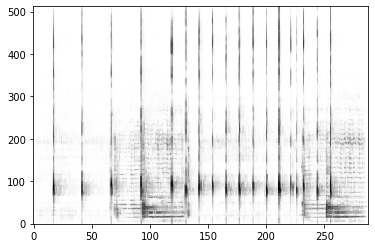

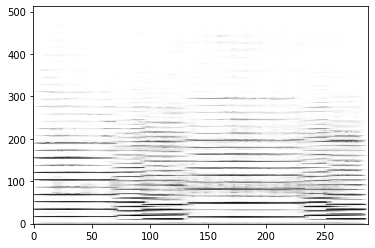

In [6]:
# your code here...
import scipy
stft_y_filtered_v = scipy.signal.medfilt(stft_y, kernel_size=[15, 1])
stft_y_filtered_h = scipy.signal.medfilt(stft_y, kernel_size=[1, 15])
plot_spectogram_compressed(stft_y_filtered_v)
plot_spectogram_compressed(stft_y_filtered_h)

<div class="alert alert-block alert-warning">
Play around with different filter lengths (3, 11, 51, 101). Visualize the filtered spectrograms. What are your observations?
</div>

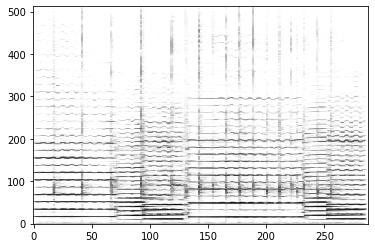

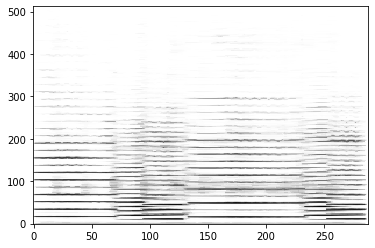

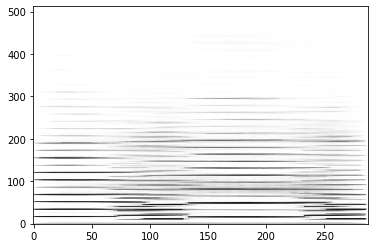

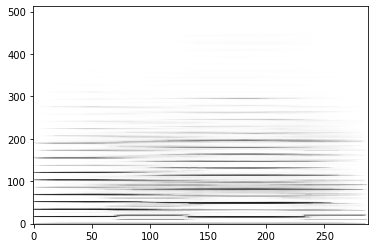

In [7]:
stft_y_filtered_h_3 = scipy.signal.medfilt(stft_y, kernel_size=[1, 3])
stft_y_filtered_h_11 = scipy.signal.medfilt(stft_y, kernel_size=[1, 11])
stft_y_filtered_h_51 = scipy.signal.medfilt(stft_y, kernel_size=[1, 51])
stft_y_filtered_h_101 = scipy.signal.medfilt(stft_y, kernel_size=[1, 101])
# your code here...
plot_spectogram_compressed(stft_y_filtered_h_3)
plot_spectogram_compressed(stft_y_filtered_h_11)
plot_spectogram_compressed(stft_y_filtered_h_51)
plot_spectogram_compressed(stft_y_filtered_h_101)

Quando maior o valor do tamanho do filtro, mais efetiva será a filtragem na direção definida.

### <a name="Mask"></a>  Binary Masking

Having the enhanced spectrograms $\tilde{{\mathcal Y}}_\mathrm{h}$ and $\tilde{{\mathcal Y}}_\mathrm{p}$, we now need to assign all
time-frequency bins of ${\mathcal X}$ to either the harmonic or the percussive component.
This can be done by *binary masking*.
A binary mask is a matrix ${\mathcal M}\in\{0,1\}^{M\times K}$.
It can be applied to an STFT ${\mathcal X}$ by computing
${\mathcal X} \odot {\mathcal M}$, where the operator $\odot$ denotes point-wise multiplication.
A mask value of one preserves the value in the STFT and a mask value of zero suppresses it.
For our HPSS algorithm, the binary masks are defined by comparing the values in the enhanced
spectrograms $\tilde{{\mathcal Y}}_\mathrm{h}$ and $\tilde{{\mathcal Y}}_\mathrm{p}$.

\begin{eqnarray}
{\mathcal M}_\mathrm{h}(m,k) :=
\begin{cases}
   1 & \text{if } \tilde{{\mathcal Y}}_\mathrm{h}(m,k) \geq \tilde{{\mathcal Y}}_\mathrm{p}(m,k) \\
   0       & \text{else}
  \end{cases} \\
{\mathcal M}_\mathrm{p}(m,k) :=
\begin{cases}
   1 & \text{if } \tilde{{\mathcal Y}}_\mathrm{p}(m,k) > \tilde{{\mathcal Y}}_\mathrm{h}(m,k) \\
   0       & \text{else.}
  \end{cases}
\end{eqnarray}

Applying these masks to the original STFT ${\mathcal X}$ yields the STFTs for the harmonic and the percussive component of the signal
${{\mathcal X}_\mathrm{h} := ({\mathcal X} \odot {\mathcal M}_\mathrm{h})}$ and ${{\mathcal X}_\mathrm{p} := ({\mathcal X} \odot {\mathcal M}_\mathrm{p})}$.
Note that by the definition of ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$, it holds that ${\mathcal M}_\mathrm{h}(m,k)+{\mathcal M}_\mathrm{p}(m,k) = 1$
for $m \in[0:M-1]$, $k\in[0:K-1]$.
Therefore, every time-frequency bin of ${\mathcal X}$ is assigned either to ${\mathcal X}_\mathrm{h}$ or ${\mathcal X}_\mathrm{p}$.

<div class="alert alert-block alert-warning">
<b>Lab Experiment 3</b><br>
Use the median filtered power spectrograms $\tilde{{\mathcal Y}}_\mathrm{h}$ and $\tilde{{\mathcal Y}}_\mathrm{p}$ from the previous exercise (filter length 11) to compute the binary masks ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$.
</div>

In [8]:
# your code here...
mask_h = np.where(stft_y_filtered_h >= stft_y_filtered_v, 1, 0)
mask_v = np.where(stft_y_filtered_v > stft_y_filtered_h, 1, 0)

mask_h + mask_v

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

<div class="alert alert-block alert-warning">
Visualize the masks (this time without logarithmic compression).
</div>

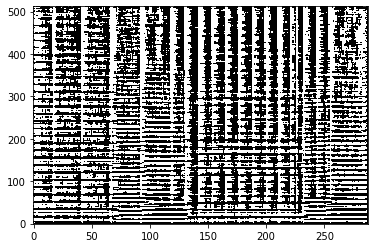

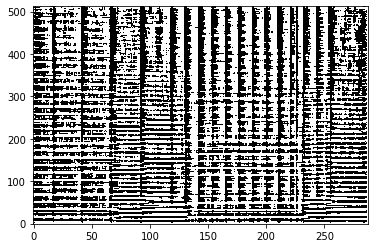

In [9]:
# your code here...
plot_spectogram_compressed(mask_h, gama=0)
plot_spectogram_compressed(mask_v, gama=0)

<div class="alert alert-block alert-warning">
Apply the masks to the original STFT ${\mathcal X}$ to compute ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$.
</div>

In [10]:
# your code here...
stft_x_mask_h = np.multiply(stft_x,mask_h)
stft_x_mask_v = np.multiply(stft_x,mask_v)

stft_x

array([[ 1.7090465e-01+0.00000000e+00j,  6.2782681e-01+0.00000000e+00j,
         1.2619289e+00+0.00000000e+00j, ...,
         7.1379358e-01+0.00000000e+00j,  1.0450723e-01+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [-5.5003408e-03-1.28833711e-17j, -2.7589604e-01+1.75187990e-01j,
        -6.0974258e-01+1.39700711e-01j, ...,
        -3.2982397e-01-1.83032587e-01j, -1.2177024e-02-9.26131755e-02j,
         0.0000000e+00+0.00000000e+00j],
       [-7.2134465e-02-1.09334359e-17j, -1.1066499e-01-1.90573204e-02j,
        -5.6709036e-02-1.14374429e-01j, ...,
        -1.7760182e-02+2.13011540e-03j, -5.5900320e-02+3.64993736e-02j,
         0.0000000e+00-0.00000000e+00j],
       ...,
       [ 2.3344303e-03-1.33526927e-17j, -2.0712129e-04-7.67015480e-03j,
         5.3472730e-04-1.09807905e-02j, ...,
         1.2376622e-03+4.90060635e-03j, -5.0766981e-04+1.18016708e-03j,
         0.0000000e+00+0.00000000e+00j],
       [ 1.2803875e-03+2.32917120e-17j,  4.1562850e-03+1.91003364e-0

<div class="alert alert-block alert-warning">
Visualize the power spectrograms ${\mathcal Y}_\mathrm{h}$ and ${\mathcal Y}_\mathrm{p}$ of ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$.
</div>

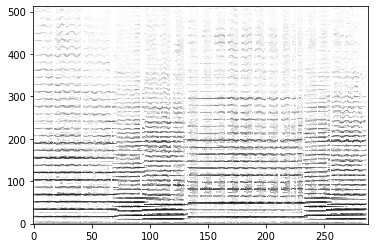

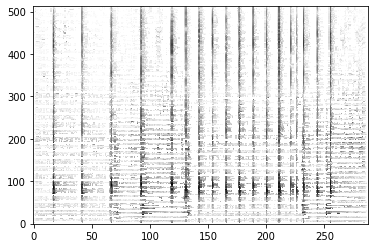

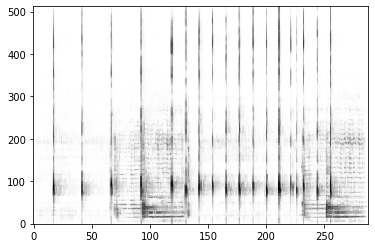

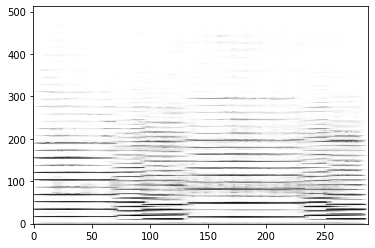

In [11]:
# your code here...
# plot_spectogram_compressed(stft_x)
plot_spectogram_compressed(np.abs(stft_x_mask_h))
plot_spectogram_compressed(np.abs(stft_x_mask_v))
plot_spectogram_compressed(stft_y_filtered_v)
plot_spectogram_compressed(stft_y_filtered_h)

### <a name="ISTFT"></a>  Inversion of the Short-Time Fourier Transform

In the final step, we need to transform our constructed STFTs ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$ back to the time-domain.
To this end, we apply an "inverse" STFT to these matrices to compute the component signals $x_\mathrm{h}$ and $x_\mathrm{p}$.
Note that the topic "inversion of the STFT" is not as trivial as it might seem at the first glance.
In the case that ${\mathcal X}$ is the original STFT of an audio signal $x$, and further preconditions are satisfied (for example that $N \geq H$ for $N$ being the size of the discrete Fourier transform and $H$ being the hopsize of the STFT),
it is possible to invert the STFT and to reconstruct $x$ from ${\mathcal X}$ perfectly.
However, as soon as the original STFT ${\mathcal X}$ has been modified to some $\tilde{{\mathcal X}}$, for example by masking, there might be no audio signal which has exactly $\tilde{{\mathcal X}}$ as its STFT.
In such a case, one usually aims to find an audio signal whose STFT is "approximately" $\tilde{{\mathcal X}}$.
For this Lab Course, you can simply assume that you can invert the STFT using <samp>librosa.istft</samp>.

<img src="./files/HPSep3.png">

<div class="alert alert-block alert-warning">
<b>Lab Experiment 4</b><br>
Apply the inverse STFT function <samp>librosa.istft</samp> to $X_\mathrm{h}$ and $X_\mathrm{p}$ from the previous experiment and listen to the results.
</div>

In [12]:
from IPython.display import display

# your code here...
x_h = librosa.istft(stft_x_mask_h, hop_length=512)
x_p = librosa.istft(stft_x_mask_v, hop_length=512)
display(Audio(x_h, rate=Fs))
display(Audio(x_p, rate=Fs))
x_h.shape, x_p.shape

((146944,), (146944,))

<div class="alert alert-block alert-warning">
Save the computed harmonic and percussive component by using <samp>sf.write</samp>.
</div>

In [13]:
from IPython.display import FileLink
import soundfile as sf

# your code here...
sf.write('x_h.wav', x_h, Fs)
sf.write('x_p.wav', x_p, Fs)
display(FileLink('x_h.wav'))
display(FileLink('x_p.wav'))

/Users/eduardo.melgaco/Documents/projects/ufmg/UFMG-music-information-retrieval/Lab08/x_h.wav

/Users/eduardo.melgaco/Documents/projects/ufmg/UFMG-music-information-retrieval/Lab08/x_p.wav

### <a name="intepret"></a>  Physical Interpretation of Parameters

Note that one can specify the filter lengths of the harmonic and percussive median filters  in seconds and Hertz, respectively.
This  makes their physical interpretation easier.
Given the sampling rate $F_\mathrm{s}$ of the input signal $x$ as well as the frame length $N$ and the hopsize $H$,
we can convert filter lengths given in seconds and Hertz to filter lengths given in indices

\begin{eqnarray}
L_\mathrm{h}(t):=\left\lceil \frac{F_\mathrm{s}}{H} t \right\rceil\label{eqn:L_h}\\
L_\mathrm{p}(d):=\left\lceil \frac{N}{F_\mathrm{s}} d \right\rceil\label{eqn:L_p}
\end{eqnarray}

In [14]:
# your code here...
def filter_h_t(Fs, H, t):
    return int(np.ceil(Fs/H * t))
def filter_v_hz(Fs, N, d):
    return int(np.ceil(N/Fs * d))

<div class="alert alert-block alert-warning">
<b>Lab Experiment 5</b><br>
Complete the implementation of the HPSS algorithm in the function <samp>HPSS</samp>:

<ol>
<li> Compute the STFT ${\mathcal X}$ of the input signal $x$ using <samp>librosa.stft </samp>.</li>
<li> Compute the power spectrogram ${\mathcal Y}$ from the ${\mathcal X}$.</li>
<li> Convert the median filter lengths from seconds and Hertz to indices. if a filter length is even, subtract 1.</li>
<li> Apply median filters to ${\mathcal Y}$ using <samp>scipy.signal.medfilt</samp> to compute ${\mathcal Y}_\mathrm{h}$ and ${\mathcal Y}_\mathrm{p}$.</li>
<li> Derive the masks ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$ from ${\mathcal Y}_\mathrm{h}$ and ${\mathcal Y}_\mathrm{p}$.</li>
<li> Compute ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$.</li>
<li> Apply the inverse STFT (<samp>librosa.istft </samp>) to get $x_\mathrm{h}$ and $x_\mathrm{p}$.</li>
</ol>
</div>

In [15]:
def HPSS(x, N, H, w, Fs, lh_sec, lp_Hz):
    # x:      Input signal
    # N:      Frame length
    # H:      Hopsize
    # w:      Window function of length N
    # Fs:     Sampling rate of x
    # lh_sec: Horizontal median filter length given in seconds
    # lp_Hz:  Percussive median filter length given in Hertz

    # stft
    stft_x = librosa.stft(x, n_fft =N, hop_length=H, window=w)
    # power spectrogram
    stft_y = np.abs(stft_x) ** 2
    # median filtering
    k_h = filter_h_t(Fs, H, lh_sec)
    k_v = filter_v_hz(Fs, N, lp_Hz)
    print(k_h, k_v)
    stft_y_filtered_v = scipy.signal.medfilt(stft_y, kernel_size=[k_v+1, 1])
    stft_y_filtered_h = scipy.signal.medfilt(stft_y, kernel_size=[1, k_h])
    # masking
    mask_h = np.where(stft_y_filtered_h >= stft_y_filtered_v, 1, 0)
    mask_v = np.where(stft_y_filtered_v > stft_y_filtered_h, 1, 0)
    stft_x_mask_h = np.multiply(stft_x,mask_h)
    stft_x_mask_v = np.multiply(stft_x,mask_v)
    # istft
    x_h = librosa.istft(stft_x_mask_h, hop_length=512)
    x_p = librosa.istft(stft_x_mask_v, hop_length=512)

    return x_h, x_p

<div class="alert alert-block alert-warning">
Test your implementation:

<ol>
<li> Load the audio files <samp>Stepdad.wav</samp>, <samp>Applause.wav</samp>, and <samp>DrumSolo.wav</samp> from the <samp>Data</samp> folder.</li>
<li> Apply HPSS using the parameters <samp>N=1024</samp>, <samp>H=512</samp>, a hann-window, <samp>lh_sec=0.2</samp>, and <samp>lp_Hz=500</samp> to all loaded signals.</li>
<li>Listen to the results.</li>
</ol>
</div>

In [16]:
for file in ('files/Stepdad.wav', 'files/Applause.wav', 'files/DrumSolo.wav'):
    print('# ' + file)

    # your code here...
    x, Fs = librosa.load(file)
    x_h, x_p = HPSS(x, 1024, 512, 'hann', Fs, 0.2, 500)

    print('Orignal')
    display(Audio(x, rate=Fs))
    print('Harmonic Component')
    display(Audio(x_h, rate=Fs))
    print('Percussive Component')
    display(Audio(x_p, rate=Fs))
    print('')

# files/Stepdad.wav
9 24
Orignal


Harmonic Component


Percussive Component



# files/Applause.wav
9 24
Orignal


Harmonic Component


Percussive Component



# files/DrumSolo.wav
9 24
Orignal


Harmonic Component


Percussive Component


<h4>Reference</h4>
<br/>

<div>
  <a href="http://www.springer.com/gp/book/9783319219448">
    <img src="./files/FMP_Cover.png" alt="FMP_Cover" width="80"  style="float:right;">
  </a>
</div>

<div style="float:left;">
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> <br />
Fundamentals of Music Processing &ndash; Audio, Analysis, Algorithms, Applications  <br />
ISBN: 978-3-319-21944-8<br />
483 p., <a href="http://www.springer.com/gp/book/9783319219448">Springer</a>, 2015  <br />
<a href="http://www.music-processing.de">www.music-processing.de</a>    <br />
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP">Accompanying Website</a>
</div>

<h4>Acknowledgment</h4>
<br/>
The International Audio Laboratories Erlangen are a joint institution of the Friedrich-Alexander-Universität Erlangen-Nürnberg (FAU) and Fraunhofer Institute for Integrated Circuits IIS.